In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
import torch
from torch.utils.data import Dataset


In [2]:
gnm2 = np.load('spikes_gnm2.npy')
nm2 = np.load('spikes_nm2.npy')
nnm2 = np.load('spikes_nnm2.npy')
# spont = np.load('spontaneous1.npy')
print(gnm2.shape)
print(nm2.shape)
print(nnm2.shape)
# print(spont.shape)

(123, 14999, 120)
(123, 14999, 120)
(123, 14999, 120)


In [3]:
f = lambda x: np.mean(x, axis=2, keepdims=False).astype(np.float64)
data = [f(gnm2), f(nm2), f(nnm2)]
label = [np.zeros((gnm2.shape[1]), dtype=np.int64), np.ones((nm2.shape[1]), dtype=np.int64), np.ones((nnm2.shape[1]), dtype=np.int64) * 2]
Xs = np.concatenate(data, axis=1).transpose((1, 0))
ys = np.concatenate(label, )
print(f'the shape of Xs: {Xs.shape}')
print(f'the shape of ys: {ys.shape}')

the shape of Xs: (44997, 123)
the shape of ys: (44997,)


In [4]:
# shuffle
np.random.seed(615)
order = np.arange(ys.shape[0])
np.random.shuffle(order)

In [5]:
# ys = ys[order]
Xs, ys = Xs[order], ys[order]

In [6]:
# split them into train_set and val_set
rate = 0.6
split = int(rate * ys.shape[0])
Xs_train, ys_train = Xs[:split], ys[:split]
Xs_val, ys_val = Xs[split:], ys[split:]

In [7]:
# check the most active neuron
y = lambda x: np.argmax(np.sum(x, axis=1, keepdims=False))
most_active = [y(data[0]), y(data[1]), y(data[2])]
print(most_active)

[43, 119, 42]


In [8]:
# ----------------------- LDA
# First, reduce the dimentionality of DATA by Linear Discriminative Analysis (LDA).
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(Xs_train, ys_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

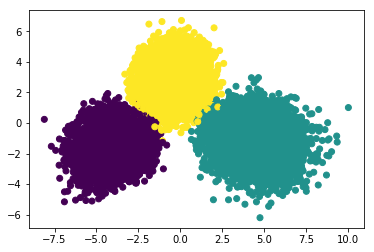

In [9]:
# train
X_new_train = lda.transform(Xs_train)
plt.scatter(X_new_train[:, 0], X_new_train[:, 1], marker='o', c=ys_train)
plt.show()

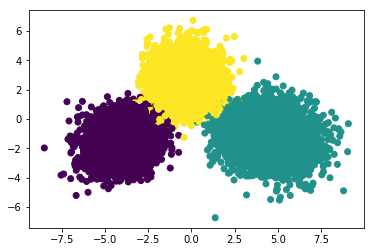

In [10]:
# val
X_new_val = lda.transform(Xs_val)
plt.scatter(X_new_val[:, 0], X_new_val[:, 1], marker='o', c=ys_val)
plt.show()

In [11]:
# Second, cluster by kNN.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new_train, ys_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
0.9978887715984222knn.score(X_new_val, ys_val)

0.9978887715984222

In [13]:
# ----------------------- PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xs_train, ys_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

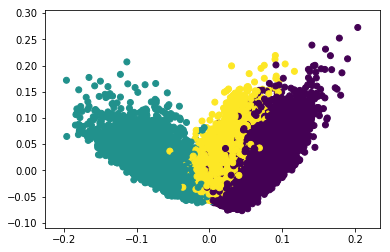

In [14]:
# train
X_new_train = pca.transform(Xs_train)
plt.scatter(X_new_train[:, 0], X_new_train[:, 1], marker='o', c=ys_train)
plt.show()

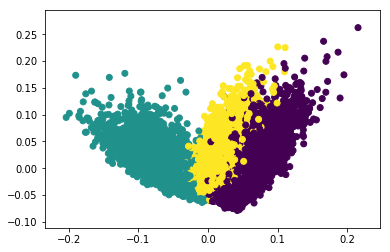

In [16]:
# val
X_new_val = pca.transform(Xs_val)
plt.scatter(X_new_val[:, 0], X_new_val[:, 1], marker='o', c=ys_val)
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new_train, ys_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.score(X_new_val, ys_val) 

0.923440191121729

In [13]:
# ----------------------- LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
lle.fit(Xs_train, ys_train)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=5, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

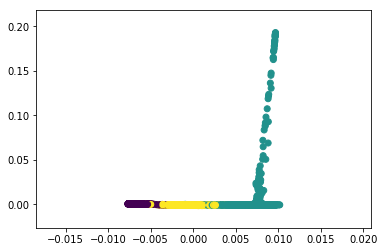

In [14]:
# train
X_new_train = lle.fit_transform(Xs_train)
plt.scatter(X_new_train[:, 0], X_new_train[:, 1], marker='o', c=ys_train)
plt.show()

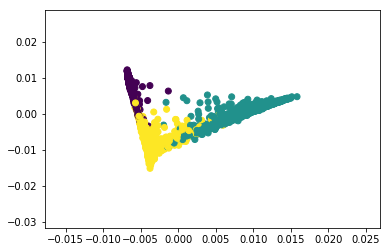

In [15]:
# val
X_new_val = lle.fit_transform(Xs_val)
plt.scatter(X_new_val[:, 0], X_new_val[:, 1], marker='o', c=ys_val)
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new_train, ys_train)
print(knn.score(X_new_val, ys_val))

0.9814434135229735


In [9]:
# ----------------------- ISOMap
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
isomap.fit(Xs_train, ys_train)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

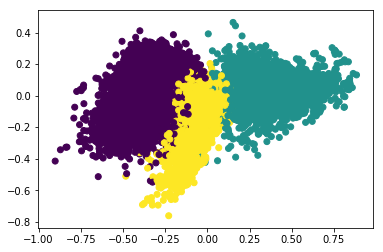

In [10]:
# train
X_new_train = isomap.fit_transform(Xs_train)
plt.scatter(X_new_train[:, 0], X_new_train[:, 1], marker='o', c=ys_train)
plt.show()


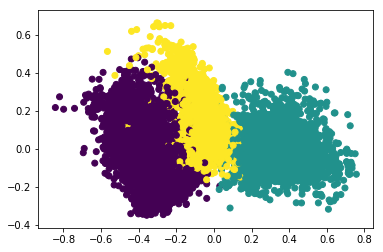

In [11]:
# val
X_new_val = isomap.fit_transform(Xs_val)
plt.scatter(X_new_val[:, 0], X_new_val[:, 1], marker='o', c=ys_val)
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_new_train, ys_train)
print(knn.score(X_new_val, ys_val))

0.8447135951997333


In [ ]:
bbb = 3